<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-Large-videogame-companies" data-toc-modified-id="EDA-Large-videogame-companies-1">EDA Large videogame companies</a></span><ul class="toc-item"><li><span><a href="#Etapa-1:-Formulación-del-problema-general" data-toc-modified-id="Etapa-1:-Formulación-del-problema-general-1.1"><font color="#006767">Etapa 1: Formulación del problema general</font></a></span></li><li><span><a href="#Etapa-2:-Barrido-general-de-datos" data-toc-modified-id="Etapa-2:-Barrido-general-de-datos-1.2"><font color="#006767">Etapa 2: Barrido general de datos</font></a></span></li><li><span><a href="#Etapa-3:-Reconocer-los-tipos-de-datos-disponibles-y-su-escala-de-medición" data-toc-modified-id="Etapa-3:-Reconocer-los-tipos-de-datos-disponibles-y-su-escala-de-medición-1.3"><font color="#006767">Etapa 3: Reconocer los tipos de datos disponibles y su escala de medición</font></a></span></li><li><span><a href="#Etapa-4:-Data-Wrangling" data-toc-modified-id="Etapa-4:-Data-Wrangling-1.4"><font color="#006767">Etapa 4: Data Wrangling</font></a></span></li><li><span><a href="#Etapa-5:-Selección-de-estadísticos-y-gráficos" data-toc-modified-id="Etapa-5:-Selección-de-estadísticos-y-gráficos-1.5"><font color="#006767">Etapa 5: Selección de estadísticos y gráficos</font></a></span></li><li><span><a href="#Etapa-6:-Resumen-de-datos-por-agrupación" data-toc-modified-id="Etapa-6:-Resumen-de-datos-por-agrupación-1.6"><font color="#006767">Etapa 6: Resumen de datos por agrupación</font></a></span></li></ul></li></ul></div>

## EDA Large videogame companies

**Carga de librerías**

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

**Otras consideraciones**

In [29]:
# Cambiar la notación científica por un formato nuemral con 2 decimales 
pd.options.display.float_format = '{:.2f}'.format
# Restablecer los cambios
#pd.reset_option('^display.', silent=True)

**Importado de datos**

In [3]:
df = pd.read_csv('GamingCompanies-Main.csv', sep = ",")

### <font color=#006767>Etapa 1: Formulación del problema general

*Sintetizar la información disponible del dataset adoptando un enfoque descriptivo*

### <font color=#006767>Etapa 2: Barrido general de datos

In [4]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             79 non-null     object 
 1   marketcap        79 non-null     float64
 2   earnings         79 non-null     int64  
 3   employeeCount    79 non-null     int64  
 4   OperatingMargin  78 non-null     float64
 5   PERatio          79 non-null     float64
 6   Revenue          79 non-null     float64
 7   country          79 non-null     object 
dtypes: float64(4), int64(2), object(2)
memory usage: 5.1+ KB


In [5]:
df.head()

,Name,marketcap,earnings,employeeCount,OperatingMargin,PERatio,Revenue,country
0,11 bit studios,2.600171e+08,8147710,192,4583.070,40.8881,1.777785e+07,Poland
1,Activision Blizzard,5.835960e+10,2972000000,9500,3582.020,23.4717,8.297000e+09,United States
2,Appirits,3.008261e+07,1591300,411,372.253,31.0000,4.274776e+07,Japan
3,Aristocrat,1.551363e+10,778411000,7000,2266.820,14.2970,3.433941e+09,Australia
4,ATARI,4.923000e+07,-13476800,26,-6296.300,-3.0000,2.140430e+07,France


**1.** Existen valores vacíos.

**2.** Se puede ajustar el tipo de variable según los valores de las columnas.

**3.** El dataset usa el cero (0) como un dato faltante, por lo que es psoible transofrmarlo en NaN para no corrompoer los cálculos estadísticos.

### <font color=#006767>Etapa 3: Reconocer los tipos de datos disponibles y su escala de medición

Las variables marketcap y Revenue deben ser de tipo entero

In [6]:
df.dtypes

Name                object
marketcap          float64
earnings             int64
employeeCount        int64
OperatingMargin    float64
PERatio            float64
Revenue            float64
country             object
dtype: object

### <font color=#006767>Etapa 4: Data Wrangling

In [7]:
df1 = df.copy()

# Las grades cifras de las columnas 'marketcap', 'earnings' y 'revenue' serán
# reducidas mediante la división entre múltipplos de 10.
df1['Marketcap [M]'] = df1['marketcap'] / (10**6)
df1['Earnings [M]'] = df1['earnings'] / (10**6)
df1['Revenue [M]'] = df1['Revenue'] / (10**6)
df1 = df1.drop(['marketcap','earnings','Revenue'], axis = 1)

# Reemplazo de 0 por NaN
df1 = df1.replace(0,pd.NA)

# Cambio del tipo de variable
df1 = df1.astype({'employeeCount': 'Int64',
                  'OperatingMargin': 'Float64',
                  'PERatio': 'Float64',
                  'Marketcap [M]': 'Float64',
                  'Earnings [M]': 'Float64',
                  'Revenue [M]': 'Float64'})

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             79 non-null     object 
 1   employeeCount    62 non-null     Int64  
 2   OperatingMargin  74 non-null     Float64
 3   PERatio          74 non-null     Float64
 4   country          79 non-null     object 
 5   Marketcap [M]    79 non-null     Float64
 6   Earnings [M]     74 non-null     Float64
 7   Revenue [M]      74 non-null     Float64
dtypes: Float64(5), Int64(1), object(2)
memory usage: 5.5+ KB


In [8]:
df1[df1['OperatingMargin'].isna()]

,Name,employeeCount,OperatingMargin,PERatio,country,Marketcap [M],Earnings [M],Revenue [M]
12,Com2uS,<NA>,<NA>,<NA>,South Korea,774.362851,<NA>,<NA>
43,Neowiz Games,<NA>,<NA>,<NA>,South Korea,413.029801,<NA>,<NA>
50,Pearl Abyss,<NA>,<NA>,<NA>,South Korea,567.673846,<NA>,<NA>
76,Webzen,<NA>,<NA>,<NA>,South Korea,500.747702,<NA>,<NA>
77,Wemade,<NA>,<NA>,<NA>,South Korea,868.679469,<NA>,<NA>


In [9]:
# Verificación
#count = (df1 == 0).sum()
#count

#df1.isna().sum()

#df1.isnull().sum()
#df1[df1.OperatingMargin.isnull()]


#df1.head()

### <font color=#006767>Etapa 5: Selección de estadísticos y gráficos

In [10]:
print(df1['employeeCount'].mean())
print(df1['employeeCount'].std())

10170.725806451614
29814.81936844102


El método describe excluye automáticamente los valores faltantes

In [11]:
df1.describe(include='object')

,Name,country
count,79,79
unique,79,18
top,11 bit studios,Japan
freq,1,24


In [12]:
df1.describe()

,employeeCount,OperatingMargin,PERatio,Marketcap [M],Earnings [M],Revenue [M]
count,62.000000,74.000000,74.000000,7.900000e+01,74.000000,74.000000
mean,10170.725806,-1441.566096,338.201060,3.645219e+04,2118.322146,6723.677747
std,29814.819368,18666.687786,1698.012263,2.114950e+05,10858.041528,26066.451541
min,26.000000,-153192.000000,-495.024000,8.222565e+00,-1576.240000,0.753678
25%,336.750000,347.170000,6.052735,3.350410e+02,2.241895,147.804626
50%,1392.000000,1578.110000,14.913150,1.056105e+03,47.266600,600.867093
75%,6554.250000,2598.562500,26.135325,6.084565e+03,469.936500,2361.810870
max,181000.000000,6696.980000,12392.800000,1.828550e+06,84754.000000,192557.000000


**Hallazgos parciales**
1. Existen valores faltantes en la mayoría de las variables de estudio.
2. Las desviaciones estándar son mayores que la media y los valores máximos están muy alejados del percentil 75. Esto puede indicar que la mediana es una mejor medida de tendencia central y que existen valores atíícos (outliers).
3. Los datos de la columna 'Name' no son criterios de agrupamiento ya que solo funcionan como identificador.

In [13]:
# Tabla de frecuencias e histogramas

**Hallazgos parciales**

In [ ]:
# Estudios por país
#pd.pivot_table(data = df1, index = ['country'], values = ['Name'],aggfunc = [len])
pd.DataFrame(df1['country'].value_counts()).reset_index()

### <font color=#006767>Etapa 6: Resumen de datos por agrupación

In [16]:
df1.head()

,Name,employeeCount,OperatingMargin,PERatio,country,Marketcap [M],Earnings [M],Revenue [M]
0,11 bit studios,192,4583.07,40.8881,Poland,260.017093,8.14771,17.777847
1,Activision Blizzard,9500,3582.02,23.4717,United States,58359.599104,2972.0,8297.0
2,Appirits,411,372.253,31.0,Japan,30.082613,1.5913,42.747761
3,Aristocrat,7000,2266.82,14.297,Australia,15513.627256,778.411,3433.941253
4,ATARI,26,-6296.3,-3.0,France,49.230001,-13.4768,21.404304


Todas las variables del dataset muestran un indicador de desempeño para cada compañía de videojuegos. Es por ello que los agrupamientos considerarán uno o varios de estos indicadores junto con otras dimensiones de interés, como la cantidad de empleados y el país de procedencia.

**Criterio de análisis 1: Situación financiera promedio por país**

¿Por qué las cifras de OperatingMargin son tan pequeñas en comparación con las demás? ¿Acaso están medidas en millones?
El análisis omitirá al margen operativo hasta obtener mayor información sobre sus unidades de medición.

1. Se puede calcular el margen de utilidades para cada compañía.
2. Crear un gráfico que exploque las ganancias e ingresos de una compañía promedio por país.
3. Hacer un diagrama de dispersión con el la cuenta de las compañías, ingresos y ganancias para evaluar la eficiencia de todas las compañías pro país.

In [108]:
# Margen de ganancias
ca1 = (pd.pivot_table(df1, index = ['country'],
                     values = ['Marketcap [M]','Earnings [M]','Revenue [M]','Name'],
                     aggfunc ={'Marketcap [M]':np.mean,
                               'Earnings [M]':np.mean,
                               'Revenue [M]':np.mean,
                               'Name':len}).
       reset_index()[['country','Name','Marketcap [M]','Revenue [M]','Earnings [M]']].
       sort_values(by = 'Revenue [M]', inplace = False, ascending = False).reset_index(drop = True))
ca1.to_csv('ca1.csv')
#ca1.head()

ImportError: cannot import name 'FilePath' from 'pandas._typing' (C:\Users\Carlos\anaconda3\envs\DS-Env\lib\site-packages\pandas\_typing.py)

<AxesSubplot:xlabel='country', ylabel='Revenue [M]'>

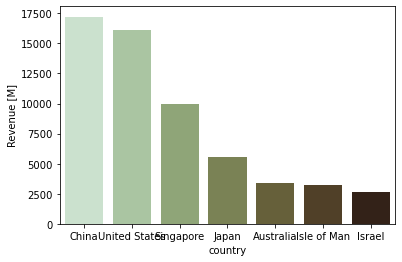

In [102]:
# Graficando los primeros 6 datos
ndata = ca1.iloc[0:7,]
sns.barplot(x = 'country', y = 'Revenue [M]', data=ndata, palette="ch:.95")

**Criterio de análisis 2: Expectativa de de ganancia sobre inversión**

In [33]:
(pd.DataFrame(df1.groupby(by = 'country').mean()['PERatio']).
sort_values(by = 'PERatio', inplace = False, ascending = False).round(decimals = 2))

,PERatio
country,
Ireland,7478.30
Isle of Man,5948.89
United Kingdom,2122.93
India,120.92
Japan,27.33
France,25.28
South Korea,24.54
China,22.05
Poland,21.48
